In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df=pd.read_csv("D:\datascience course\Day33-Machine learning Day 5 KNN algorithm\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
# check the nulls
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [15]:
# check the duplicates , i need to drop the duplicate values
df.duplicated().sum()

0

please consider the duplication after removing the high cardinality columns.

In [16]:
# delete the high cardinality column then check the duplicates
del df['Id']

In [17]:
# checking for the duplicates again
df.duplicated().sum()

3

In [18]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [19]:
# then define the problem
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# to define the problem ?
you have to answers the following questions.
- what is your goal? <br>
generalized model to classify the flower based on certain features.<br>
since the data is labeled therefore,we are talking about supervised Machine learning problem.

- what is the type of this supervised problem?
    - to determine the type of this problem you need to inspect target column (species) which is categorical
    - therefore, we are talking about classification problem.
- which type of classification problem?
    - what are the types of classification problems?
        - **binary classification** problem (your label is just Yes or No question.)
        - **multiclass classificaiton** problem(your label has a set of values more than two.) (more than two classes)
        - **multilabel classification**problem.(with the same data point you need to predict two labels)
        - after inspecting the target our problem is multiclassification problem.
- what is your inputs (Features)?
    - in the baseline experiment : we will use sepal (length and width) also petal (length and width)

- which metric to track while performing the experiment?
    - after inspection of the target since the label is balanced and all the classes matters we can use the accuracy.
  
       


In [19]:
# to answer which type of classification problem you need to inspect the target
df['Species'].value_counts(normalize=True)

Species
Iris-versicolor    0.340136
Iris-virginica     0.333333
Iris-setosa        0.326531
Name: proportion, dtype: float64

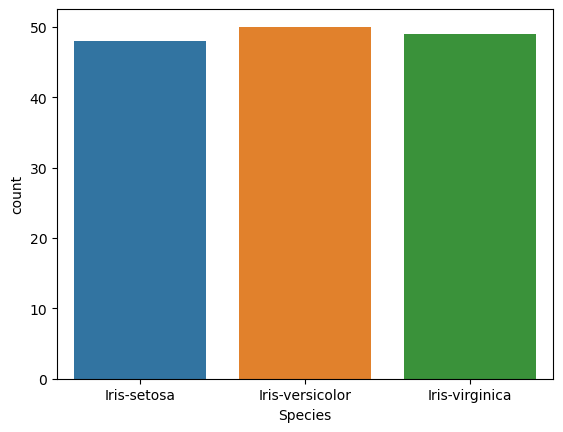

In [20]:
sns.countplot(x='Species',data=df);

# what is your experimental design?

### for the Baseline Experiment:
    - split the data to 80:20 train and test sets.
    - for the numerical features i willn't use any scaling.
    - there is no categorical features.
    - there is no missing data and also i deleted the duplicates.
    - i will test the logistic regression algorithm (to test if the classes are linearly separable or not).
    - Results:
        - after training the logistic regression we get accuracy on the testing around 97%
        - the classes are linearly separable.
        - after inspecting the features i found that only petal length and width important features,therefore for the next experiment i will only use them.

### for the second experiment:
    - split the data to 80:20 train and test sets.
    - for the numerical features i willn't use any scaling.
    - there is no categorical features.
    - there is no missing data and also i deleted the duplicates.
    - i have only used both the petal length and petal width for this experiment.
    - Results:
        - we have found that by applying this experiment the testing accuracy didn't go down it was about 97%
        - in the next experiement we will try scaling the numerical features.

# Baseline experiment:
## preprocessing (data preparation)

In [21]:
# split the features from the label
X=df.drop('Species',axis=1)
y=df['Species'] 

In [23]:
# split the data into train test splits
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)

# modeling

In [24]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
# train the model on the training data the goal is to find the model parameters.
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

### model evalution

In [25]:
print('The training accuracy',model.score(x_train,y_train))
print("The testing accuracy",model.score(x_test,y_test))

The training accuracy 0.9743589743589743
The testing accuracy 0.9666666666666667


# how to inspect more metrics:(model evalution)

In [26]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

y_train_prediciton=model.predict(x_train)
y_test_prediction=model.predict(x_test)

In [27]:
# for accuracy 
print('the training accuracy',accuracy_score(y_train,y_train_prediciton))
print('the testing accuracy',accuracy_score(y_test,y_test_prediction))

the training accuracy 0.9743589743589743
the testing accuracy 0.9666666666666667


In [28]:
# for the confusion matrix
print('confusion matrix for the training data')
print(confusion_matrix(y_train,y_train_prediciton))

confusion matrix for the training data
[[37  0  0]
 [ 0 37  2]
 [ 0  1 40]]


In [29]:
print('confusion matrix for the testing data')
print(confusion_matrix(y_test,y_test_prediction))

confusion matrix for the testing data
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


In [30]:
print('classification report for the training data')
print(classification_report(y_train,y_train_prediciton))

classification report for the training data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.97      0.95      0.96        39
 Iris-virginica       0.95      0.98      0.96        41

       accuracy                           0.97       117
      macro avg       0.98      0.97      0.97       117
   weighted avg       0.97      0.97      0.97       117



In [31]:
print('classification report for the testing data')
print(classification_report(y_test,y_test_prediction))

classification report for the testing data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



# model interpretability

In [32]:
model.coef_

array([[-0.42590311,  0.84954347, -2.34981872, -1.0115391 ],
       [ 0.56390115, -0.39924013, -0.22600835, -0.83325666],
       [-0.13799805, -0.45030334,  2.57582708,  1.84479576]])

In [33]:
model.intercept_

array([  9.51136155,   2.11366128, -11.62502283])

since the problem is considered multiclass classification problem and we have used OVR(one versus Rest) therefore we have three lines.

<BarContainer object of 4 artists>

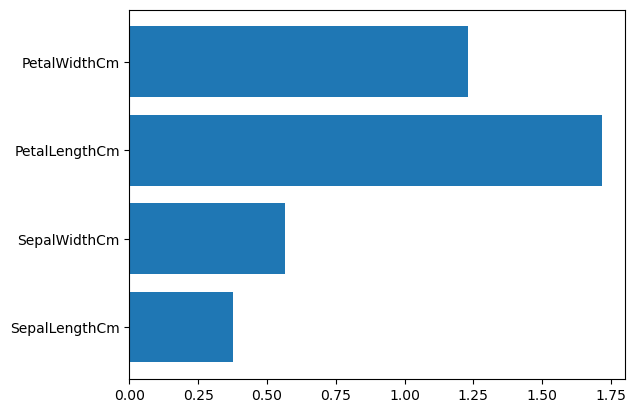

In [34]:
coef=model.coef_
coef=np.mean(abs(coef),axis=0)
names=X.columns
plt.barh(names,coef)

# one point prediction

In [35]:
test_data=np.array([5.1,3.5,1.4,0.2]).reshape(1,-1)
model.predict(test_data)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [36]:
# confidance 
model.predict_proba(test_data)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[9.76141056e-01, 2.38588923e-02, 5.18708174e-08]])

Note you can make also the error analysis.and post prediction (post processing).

# Experiment 2
## data preparation

In [37]:
# split the features from the label
X=df[['PetalLengthCm', 'PetalWidthCm']]
y=df['Species']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024)


## modelling 

In [38]:
model=LogisticRegression(max_iter=1000)
# train the model on the training data the goal is to find the model parameters.
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [39]:
print('The training accuracy',model.score(x_train,y_train))
print("The testing accuracy",model.score(x_test,y_test))

The training accuracy 0.9572649572649573
The testing accuracy 0.9666666666666667


# model evaluation

In [40]:
y_train_prediciton=model.predict(x_train)
y_test_prediction=model.predict(x_test)
# for accuracy 
print('the training accuracy',accuracy_score(y_train,y_train_prediciton))
print('the testing accuracy',accuracy_score(y_test,y_test_prediction))
# for the confusion matrix
print('confusion matrix for the training data')
print(confusion_matrix(y_train,y_train_prediciton))

the training accuracy 0.9572649572649573
the testing accuracy 0.9666666666666667
confusion matrix for the training data
[[37  0  0]
 [ 0 36  3]
 [ 0  2 39]]


In [41]:
print('confusion matrix for the testing data')
print(confusion_matrix(y_test,y_test_prediction))

confusion matrix for the testing data
[[11  0  0]
 [ 0 11  0]
 [ 0  1  7]]


In [42]:
print('classification report for the training data')
print(classification_report(y_train,y_train_prediciton))

classification report for the training data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        37
Iris-versicolor       0.95      0.92      0.94        39
 Iris-virginica       0.93      0.95      0.94        41

       accuracy                           0.96       117
      macro avg       0.96      0.96      0.96       117
   weighted avg       0.96      0.96      0.96       117



In [43]:
print('classification report for the testing data')
print(classification_report(y_test,y_test_prediction))

classification report for the testing data
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.92      1.00      0.96        11
 Iris-virginica       1.00      0.88      0.93         8

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30



# model interpretability

<BarContainer object of 2 artists>

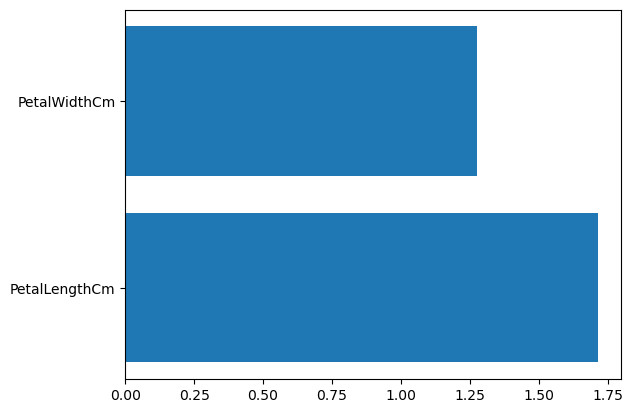

In [44]:
coef=model.coef_
coef=np.mean(abs(coef),axis=0)
names=X.columns
plt.barh(names,coef)